Epoch 1/20
469/469 [==============================] - 20s 27ms/step - loss: 0.1969 - val_loss: 0.1429
Epoch 2/20
469/469 [==============================] - 11s 23ms/step - loss: 0.1329 - val_loss: 0.1238
Epoch 3/20
469/469 [==============================] - 11s 24ms/step - loss: 0.1212 - val_loss: 0.1174
Epoch 4/20
469/469 [==============================] - 11s 22ms/step - loss: 0.1162 - val_loss: 0.1144
Epoch 5/20
469/469 [==============================] - 12s 26ms/step - loss: 0.1137 - val_loss: 0.1125
Epoch 6/20
469/469 [==============================] - 11s 24ms/step - loss: 0.1121 - val_loss: 0.1115
Epoch 7/20
469/469 [==============================] - 9s 18ms/step - loss: 0.1109 - val_loss: 0.1106
Epoch 8/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1100 - val_loss: 0.1101
Epoch 9/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1093 - val_loss: 0.1096
Epoch 10/20
469/469 [==============================] - 8s 16ms/step - loss: 0.1087 - 

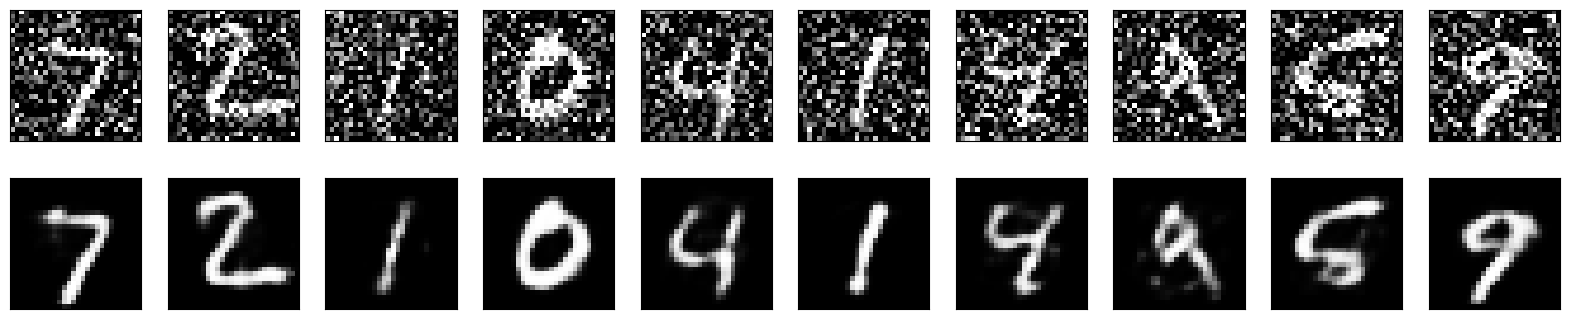

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.utils import np_utils

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (len(x_train), 784))
x_test = np.reshape(x_test, (len(x_test), 784))

# Add random noise to the input images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the pixel values to the valid range of [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the architecture of the autoencoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Use the trained autoencoder to denoise images
denoised_images = autoencoder.predict(x_test_noisy)

# Display the original noisy images and their denoised versions
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(denoised_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()